# Notebook for Cut Face Creek Sandstone pmag compilation

## import packages

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag


import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
from matplotlib import cm
import math as math

%config InlineBackend.figure_format = 'retina'

In [2]:
viridis = cm.get_cmap('viridis', 10)

In [4]:
Cutface_specimens = pd.read_csv('../../data/Pmag/cutface/specimens.txt', sep='\t', header=1)

Cutface_lat = 47.73055
Cutface_lon = -90.44128

## Plot directions

In [5]:
specimens_lt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_lt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_mt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_mt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_ht_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_ht_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==100)]

In [6]:
mean_lt = ipmag.fisher_mean(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist())
mean_lt

{'dec': 359.25711595625705,
 'inc': 67.41825277091797,
 'n': 113,
 'r': 110.63856840409576,
 'k': 47.4288563743525,
 'alpha95': 1.9491534423768082,
 'csd': 11.761526527474963}

In [7]:
mean_mt = ipmag.fisher_mean(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())
mean_mt

{'dec': 287.17888483239904,
 'inc': 41.57971127654676,
 'n': 160,
 'r': 157.10927995957664,
 'k': 55.003596950437874,
 'alpha95': 1.5158428764393486,
 'csd': 10.921680643707267}

In [8]:
mean_ht = ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())
mean_ht

{'dec': 287.2295636872718,
 'inc': 29.007417112946914,
 'n': 152,
 'r': 148.44262899177824,
 'k': 42.447076689783025,
 'alpha95': 1.7756643774953274,
 'csd': 12.432576090443026}

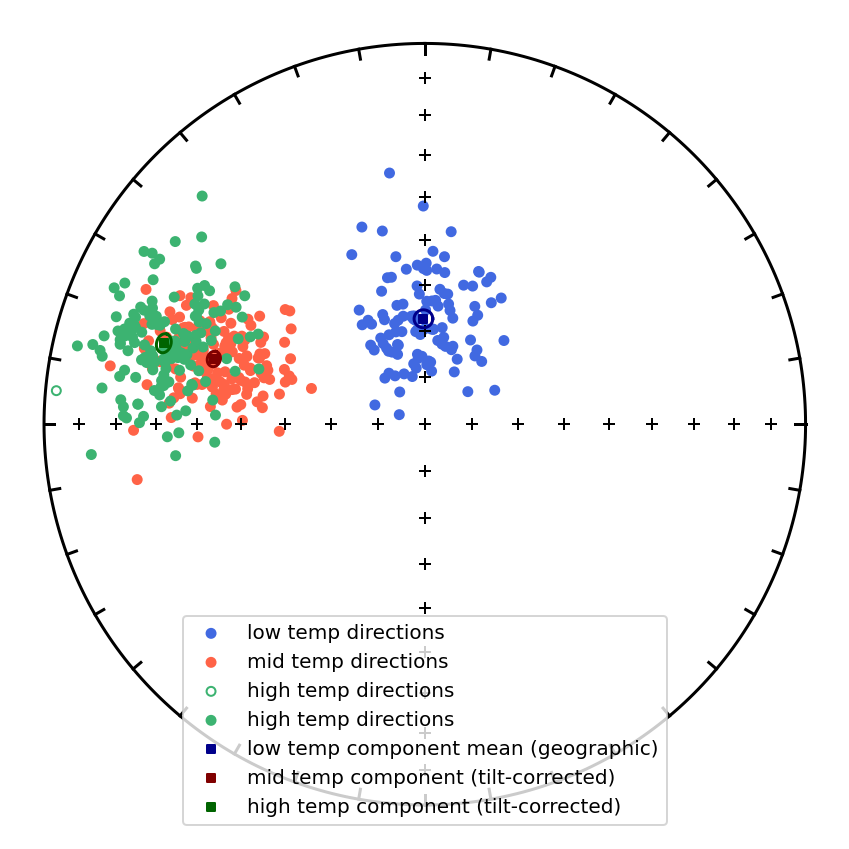

In [86]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist(),color='royalblue',label='low temp directions')
ipmag.plot_di(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist(),color='tomato',label='mid temp directions')
ipmag.plot_di(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist(),color='mediumseagreen',label='high temp directions')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component mean (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='maroon', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8)
plt.savefig('../code_output/specimen_directions.pdf')
plt.show()

In [ ]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist(),color='royalblue',label='low temp directions')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component mean (geographic)')

plt.legend(loc=8,bbox_to_anchor=(0.50,0.25))
plt.savefig('code_output/specimen_directions_lt.pdf')
plt.show()

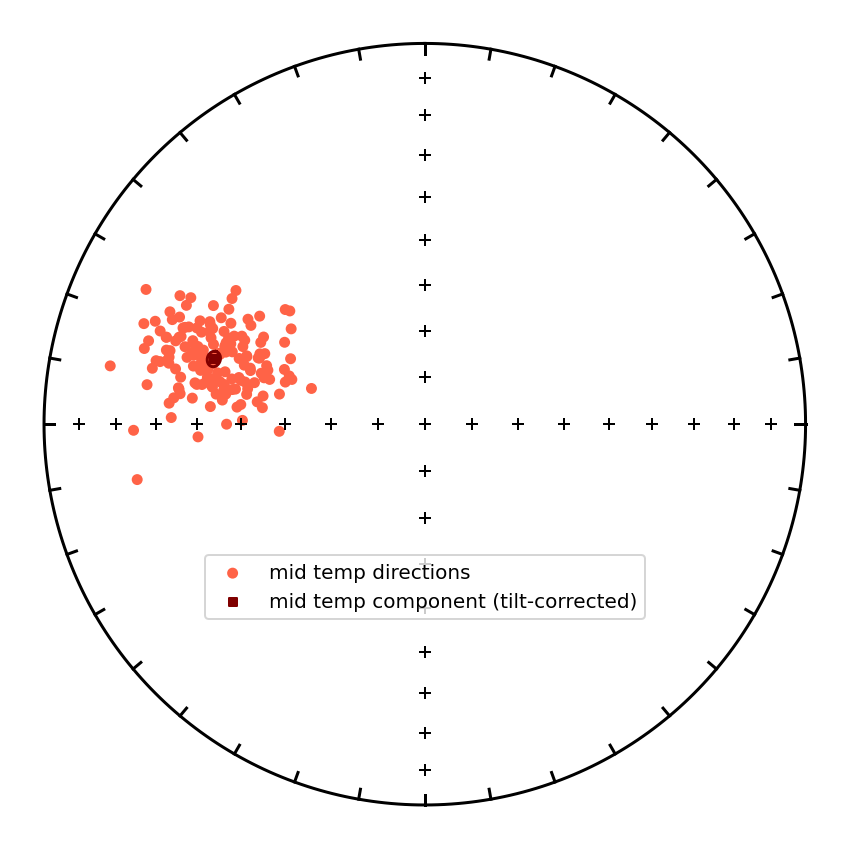

In [11]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist(),color='tomato',label='mid temp directions')

ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                    color='maroon', marker = 's', label='mid temp component (tilt-corrected)')

plt.legend(loc=8,bbox_to_anchor=(0.50,0.25))
plt.savefig('../code_output/specimen_directions_mt.pdf')
plt.show()

In [12]:
specimens_ht_tc_above_0=specimens_ht_tc[specimens_ht_tc['dir_inc']<0]
specimens_ht_tc_below_0=specimens_ht_tc[specimens_ht_tc['dir_inc']>0]
specimens_ht_tc_above_0

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,dir_dang,dir_mad_free,meas_step_max,meas_step_min,meas_step_unit,analysts,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site,specimen_name
307,CF-134a,CF-134a_LP-DIR-T,CF-134a,NaN,ht,275.2,-3.2,3.0,10.0,100.0,3.5,9.7,960.0,937.0,K,NaN,hargrave 2021-02-13 19:30:03,pmagpy-4.2.69: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Cutface Creek,CF,CF-134a


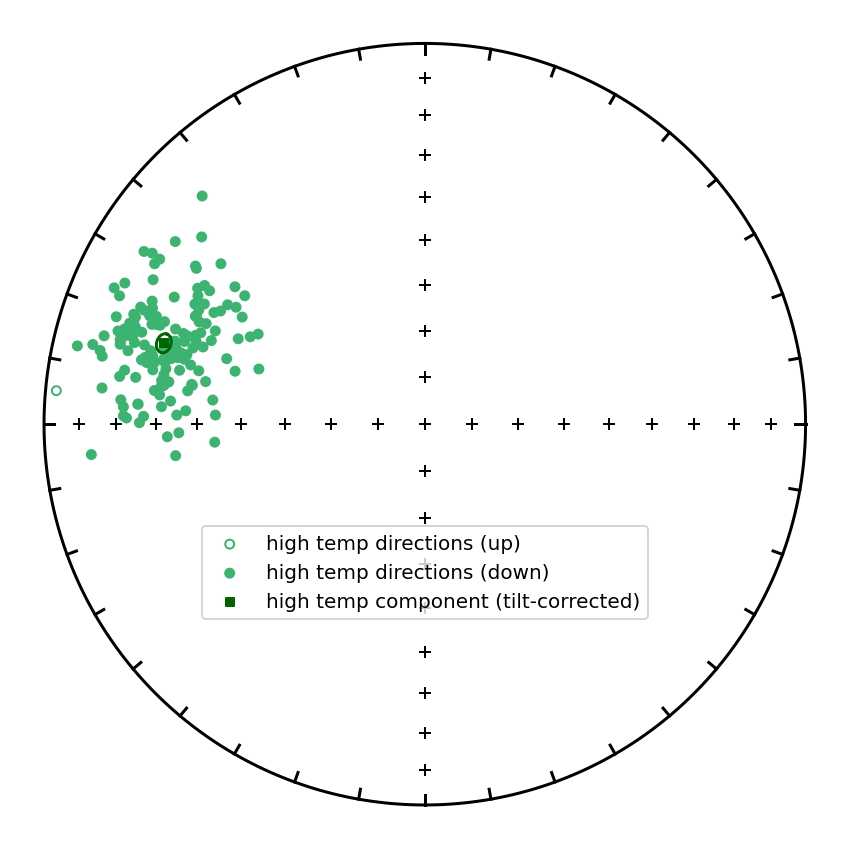

In [14]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_ht_tc_above_0['dir_dec'].tolist(),specimens_ht_tc_above_0['dir_inc'].tolist(),color='mediumseagreen',label='high temp directions (up)')
ipmag.plot_di(specimens_ht_tc_below_0['dir_dec'].tolist(),specimens_ht_tc_below_0['dir_inc'].tolist(),color='mediumseagreen',label='high temp directions (down)')

ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8,bbox_to_anchor=(0.50,0.25))
plt.savefig('../code_output/specimen_directions_ht.pdf')
plt.show()

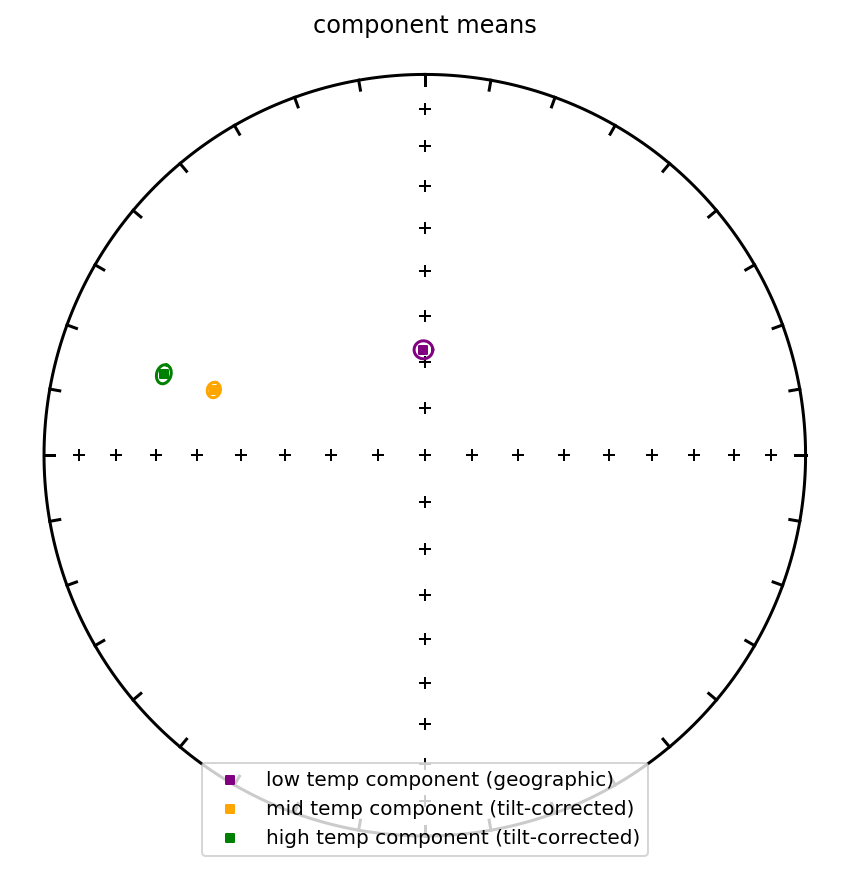

In [15]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='purple', marker = 's', label='low temp component (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='orange', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='green', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8)
plt.title('component means')
plt.show()

## Plot IGRF, dipole, CF, and NSVG together

### Local geomagnetic field 

Calculate the local geomagnetic field at the study site both using the IGRF model and the long-term dipole field using the dipole equation.

In [17]:
local_igrf = ipmag.igrf([2020.7664, 188, Cutface_lat, Cutface_lon])
local_igrf_dec = local_igrf[0]
local_igrf_inc = local_igrf[1]

local_dipole_dec = 0
local_dipole_inc = ipmag.inc_from_lat(Cutface_lat)
local_igrf

array([  357.50294636,    73.03790699, 50872.59445579])

## Expected direction from NSVG

Here we take the NSVG upper northeast sequence pole as calculated in Swanson-Hysell et al. 2019 and determine the predicted direction for the Cutface Creek section.

In [18]:
NSVG_pole_lat = 31.1 
NSVG_pole_lon = 181.7
NSVG_A95 = 4.2

NSVG_dec, NSVG_inc = pmag.vgp_di(NSVG_pole_lat,NSVG_pole_lon,Cutface_lat, Cutface_lon)

In [19]:
print('expected inclination from NSVG data:')
print(NSVG_inc)

expected inclination from NSVG data:
41.43279095168165


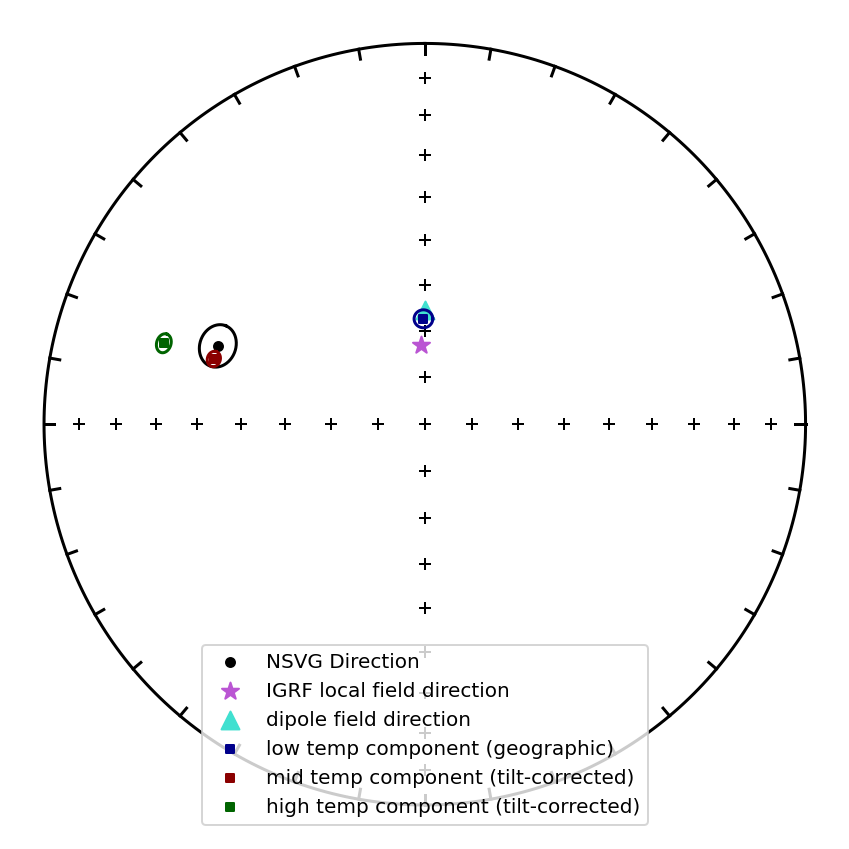

In [21]:
cf_igrf_nsvg_stereonet=plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_A95, label='NSVG Direction') #need to replace with direction A95
ipmag.plot_di([local_igrf_dec],[local_igrf_inc], marker = '*', label='IGRF local field direction', markersize=80, color='mediumorchid')
ipmag.plot_di([local_dipole_dec],[local_dipole_inc], marker = '^',label='dipole field direction',markersize=80, color='turquoise')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='darkred', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8)
cf_igrf_nsvg_stereonet.savefig('../code_output/cf_igrf_nsvg_stereonet.pdf', bbox_inches='tight')
plt.show()

## Empirical flattening factor determination

$tan(I_{observed}) = f*tan(I_{field})$

$I_{observed}$ : inclination of sedimentary rock \
$I_{field}$ : inclination of local magnetic field when rock was magnetized \
$f$ : flattening factor

$f = tan(I_{observed})/tan(I_{field})$

In [22]:
f_factor_ht_mt = np.tan(np.deg2rad(mean_ht['inc']))/np.tan(np.deg2rad(mean_mt['inc']))
f_factor_ht_mt

0.624969536078142

In [23]:
f_factor_ht_NSVG = np.tan(np.deg2rad(mean_ht['inc']))/np.tan(np.deg2rad(41.4))
f_factor_ht_NSVG

0.6289321674854941

**We need to progressive unflattening the ht directions and conduct common mean tests with the population of NSVG NE directions to determine the range of f factors.**

In [24]:
ht_incs_NSVG_unsquish = ipmag.unsquish(specimens_ht_tc['dir_inc'].tolist(), .607)
# calculate mean direction of high temp component after unsquishing
ht_mean_NSVG_unsquish = ipmag.fisher_mean(dec=specimens_ht_tc['dir_dec'].tolist(), inc=ht_incs_NSVG_unsquish)

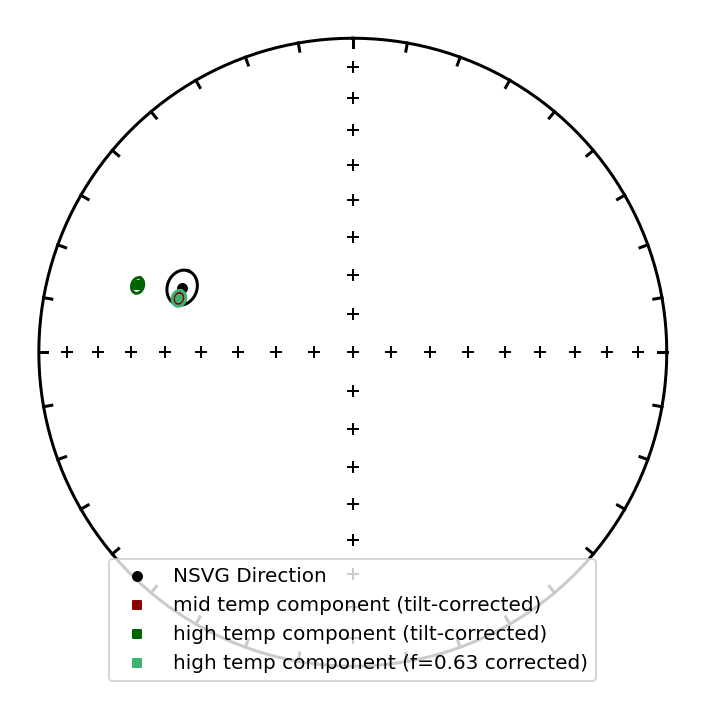

In [25]:
cf_igrf_nsvg_stereonet=plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_A95, label='NSVG Direction') #need to replace with direction A95

ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='darkred', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

unsquish_label = 'high temp component (f=' + str(np.round(f_factor_ht_NSVG,2)) +  ' corrected)'
ipmag.plot_di_mean(ht_mean_NSVG_unsquish['dec'],ht_mean_NSVG_unsquish['inc'],ht_mean_NSVG_unsquish['alpha95'],
                   color='mediumseagreen', marker = 's', label=unsquish_label)

plt.legend(loc=8)
plt.show()

## plot local volcanic directions

In [27]:
ghb_tp_specimens = pd.read_csv('../../data/Pmag/GHB_TP/specimens.txt', sep='\t', header=1)
ghb_tp_specimens_mt_geo = ghb_tp_specimens[(ghb_tp_specimens['dir_comp']=='Fit 1') & (ghb_tp_specimens['dir_tilt_correction']==0)]
ghb_tp_specimens_mt_tc = ghb_tp_specimens[(ghb_tp_specimens['dir_comp']=='Fit 1') & (ghb_tp_specimens['dir_tilt_correction']==100)]

In [28]:
ghb_tp_specimens_GH1 = ghb_tp_specimens_mt_tc[ghb_tp_specimens['site']=='GH1']
ghb_tp_specimens_GH2 = ghb_tp_specimens_mt_tc[ghb_tp_specimens['site']=='GH2']
ghb_tp_specimens_TP1 = ghb_tp_specimens_mt_tc[ghb_tp_specimens['site']=='TP1']

In [29]:
GH1_mean = ipmag.fisher_mean(ghb_tp_specimens_GH1['dir_dec'].tolist(),ghb_tp_specimens_GH1['dir_inc'].tolist())
GH2_mean = ipmag.fisher_mean(ghb_tp_specimens_GH2['dir_dec'].tolist(),ghb_tp_specimens_GH2['dir_inc'].tolist())
TP1_mean = ipmag.fisher_mean(ghb_tp_specimens_TP1['dir_dec'].tolist(),ghb_tp_specimens_TP1['dir_inc'].tolist())

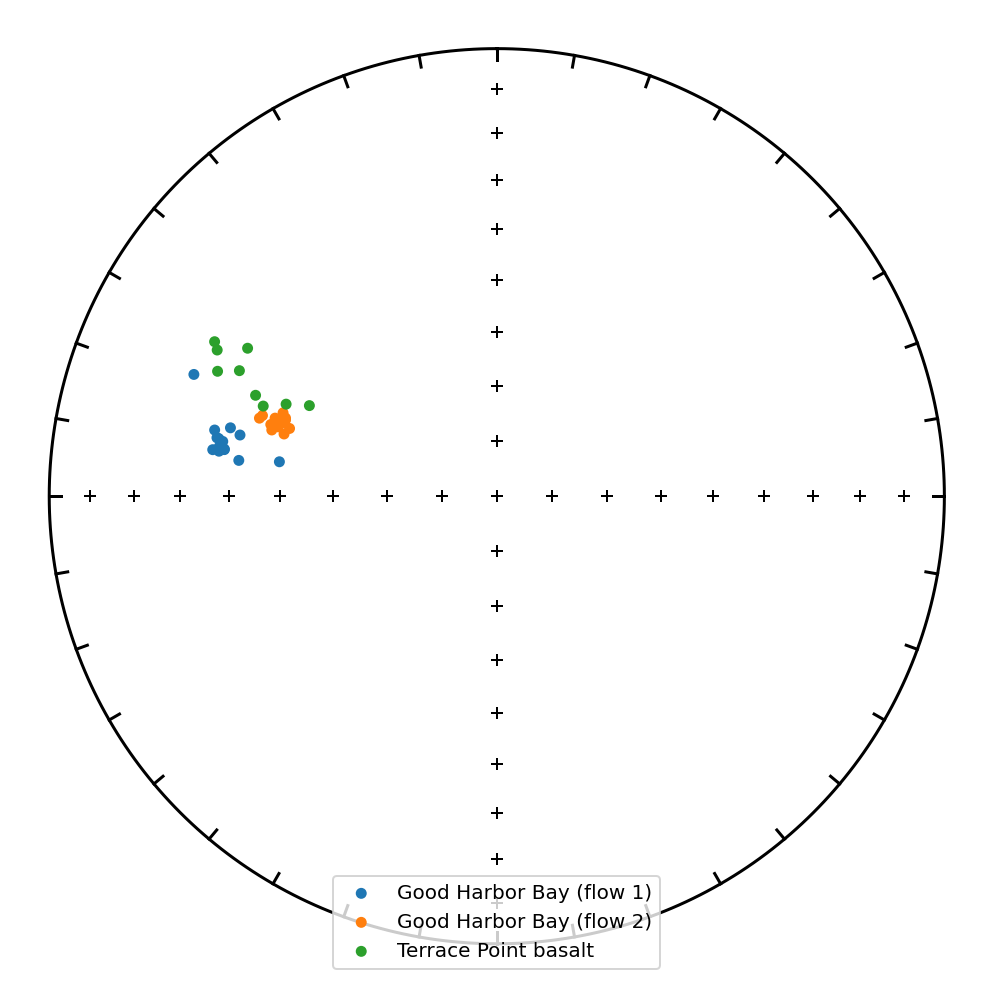

In [30]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(fignum)

ipmag.plot_di(ghb_tp_specimens_GH1['dir_dec'].tolist(),ghb_tp_specimens_GH1['dir_inc'].tolist(),color='C0',label='Good Harbor Bay (flow 1)')
ipmag.plot_di(ghb_tp_specimens_GH2['dir_dec'].tolist(),ghb_tp_specimens_GH2['dir_inc'].tolist(),color='C1',label='Good Harbor Bay (flow 2)')
ipmag.plot_di(ghb_tp_specimens_TP1['dir_dec'].tolist(),ghb_tp_specimens_TP1['dir_inc'].tolist(),color='C2',label='Terrace Point basalt')

plt.legend(loc=8)
plt.show()

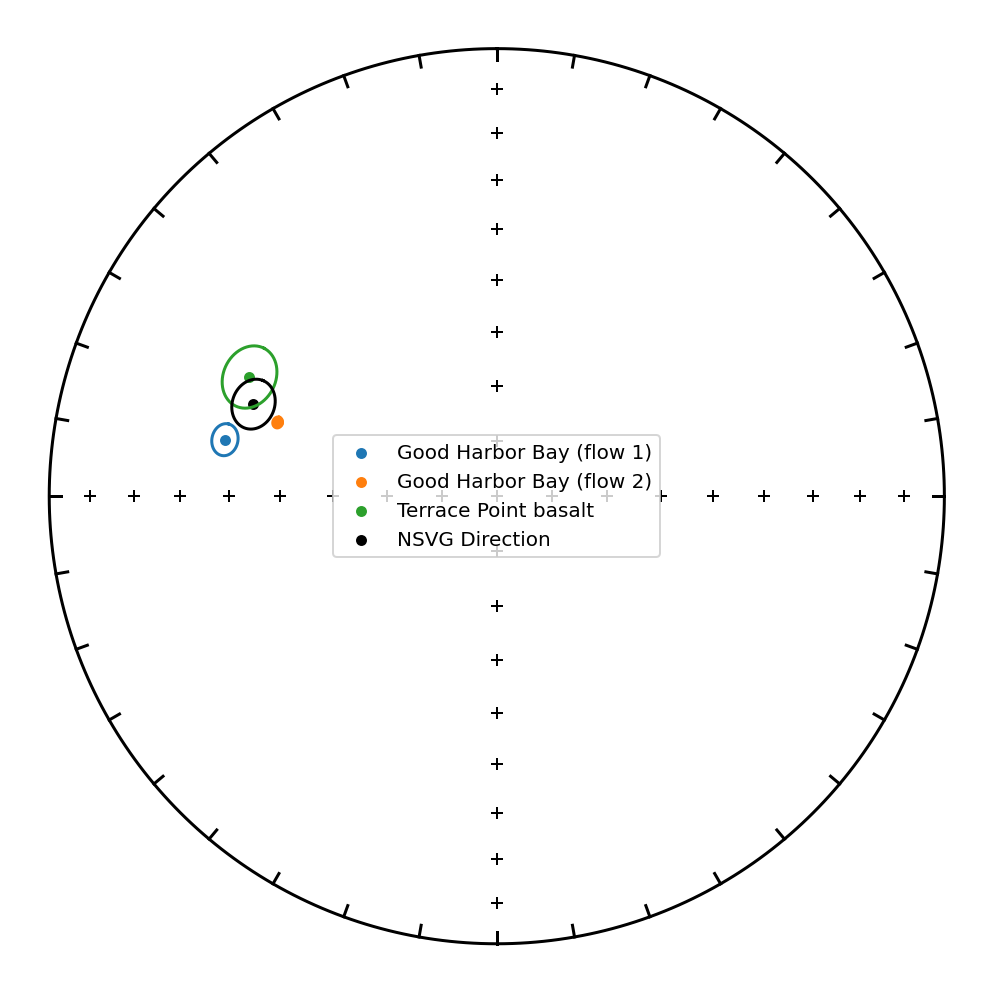

In [31]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(GH1_mean['dec'],GH1_mean['inc'],GH1_mean['alpha95'],color='C0',label='Good Harbor Bay (flow 1)')
ipmag.plot_di_mean(GH2_mean['dec'],GH2_mean['inc'],GH2_mean['alpha95'],color='C1',label='Good Harbor Bay (flow 2)')
ipmag.plot_di_mean(TP1_mean['dec'],TP1_mean['inc'],TP1_mean['alpha95'],color='C2',label='Terrace Point basalt')
ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_A95, label='NSVG Direction') 

plt.legend(loc=10)
plt.show()

## Implement the TK03 E/I method

In [88]:
ht_tc_di_block = ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())

Bootstrapping.... be patient

The original inclination was: 29.035504527698524

The corrected inclination is: 38.516611706965584
with bootstrapped confidence bounds of: 32.32977402676541 to 44.46827111390609
and elongation parameter of: 1.9954487991196233
The flattening factor is: 0.6849999999999997


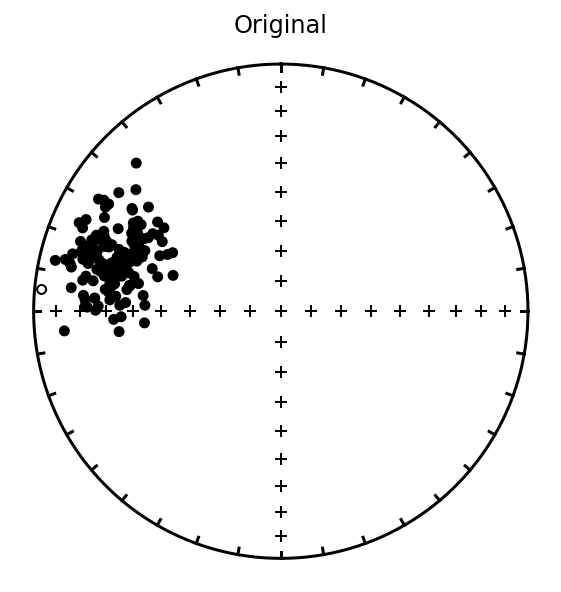

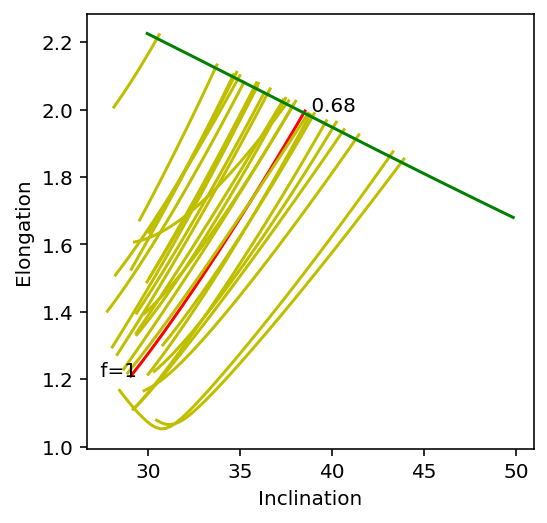

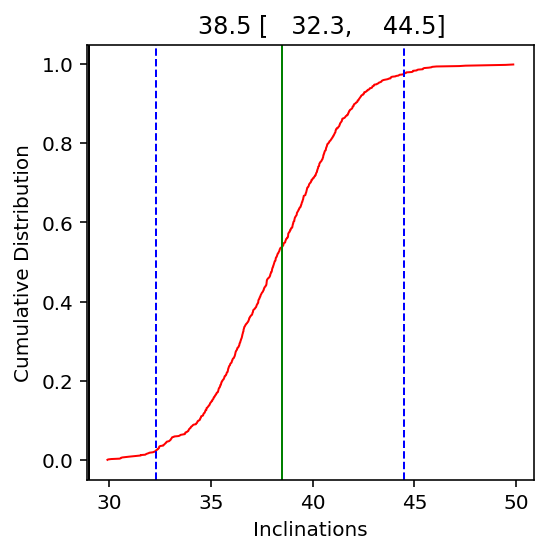

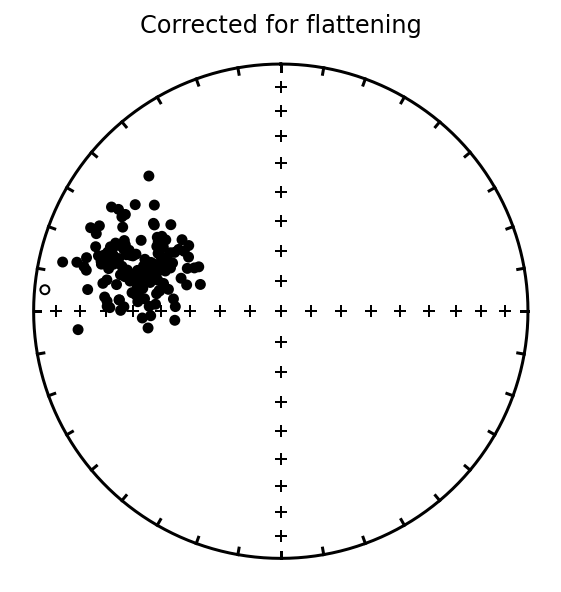

In [27]:
ht_tc_ei_corrected = ipmag.find_ei(np.array(ht_tc_di_block),save=True,save_folder='./code_output',return_new_dirs=True)

## Let's visualize different unsquishing factors

In [32]:
def unsquish_factors(decs, incs, n=5):
    # this function explores different unsquishing factors upon CF ht directions
    fignum = 1
    plt.figure(num=fignum,figsize=(8,8))
    ipmag.plot_net(fignum)
    factors = np.linspace(0.1,1, num=n)
    
    undquished_mean_list = [] 
    for i in range(len(factors)):
        unsquished_incs = ipmag.unsquish(incs , factors[i])
        unsquished_mean = ipmag.fisher_mean(decs, unsquished_incs)
        undquished_mean_list.append(unsquished_mean)
        ipmag.plot_di_mean(unsquished_mean['dec'],unsquished_mean['inc'],unsquished_mean['alpha95'],
                   color='C'+str(i), marker = 'd', label='high temp component unsquished with factor '+str(round(factors[i], 1)))
    plt.legend(loc=8)
    return undquished_mean_list
# calculate mean direction of high temp component after unsquishing

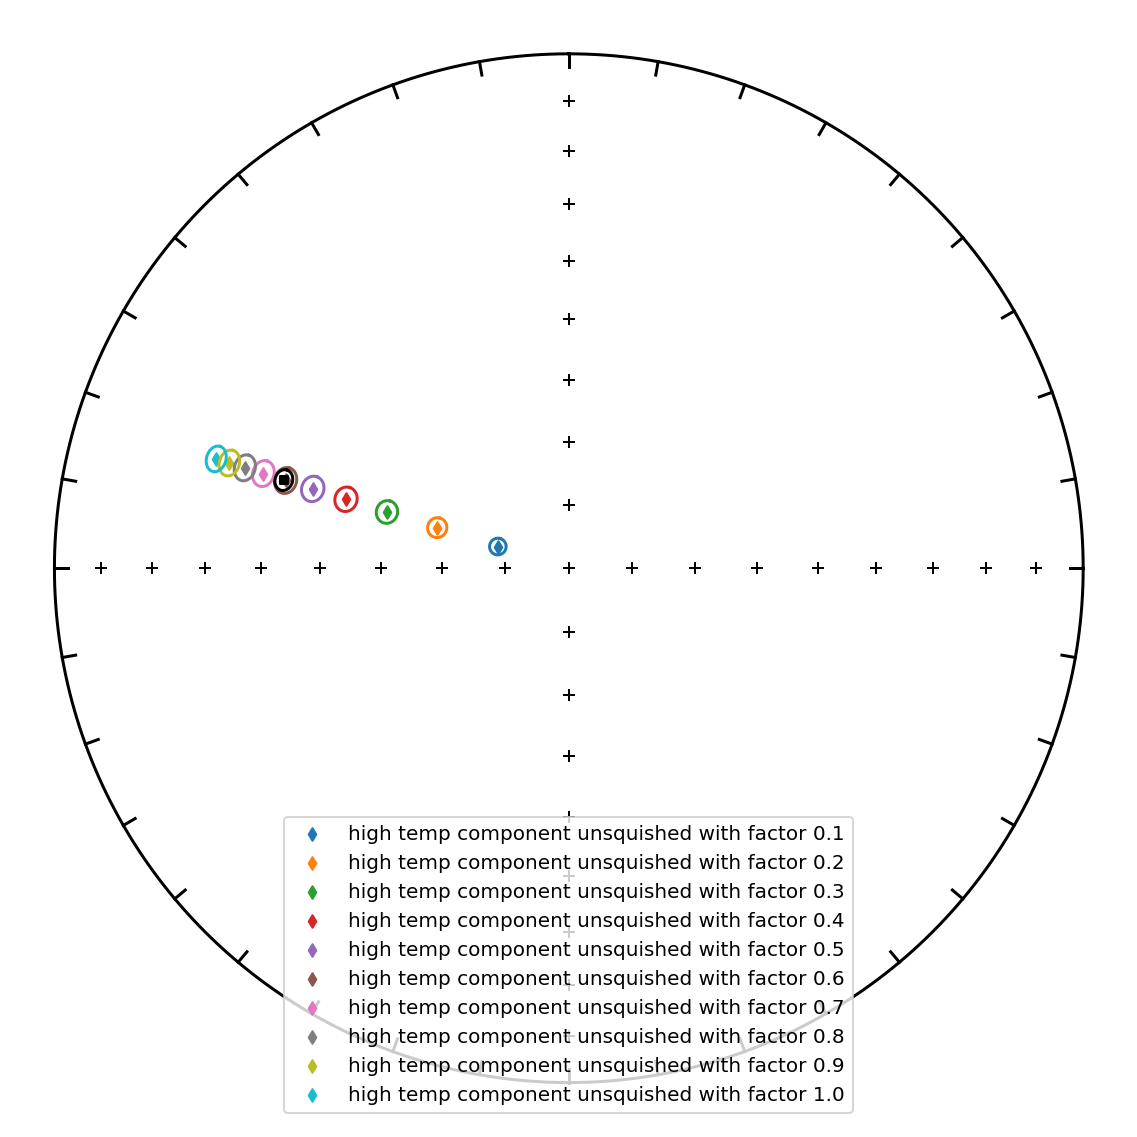

In [33]:
CF_undquished_mean_list = unsquish_factors(specimens_ht_tc['dir_dec'].tolist(), specimens_ht_tc['dir_inc'].tolist(), n=10) 
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='black', marker = 's', label='mid temp component (tilt-corrected)')

## plot everything as poles

<Figure size 360x360 with 0 Axes>

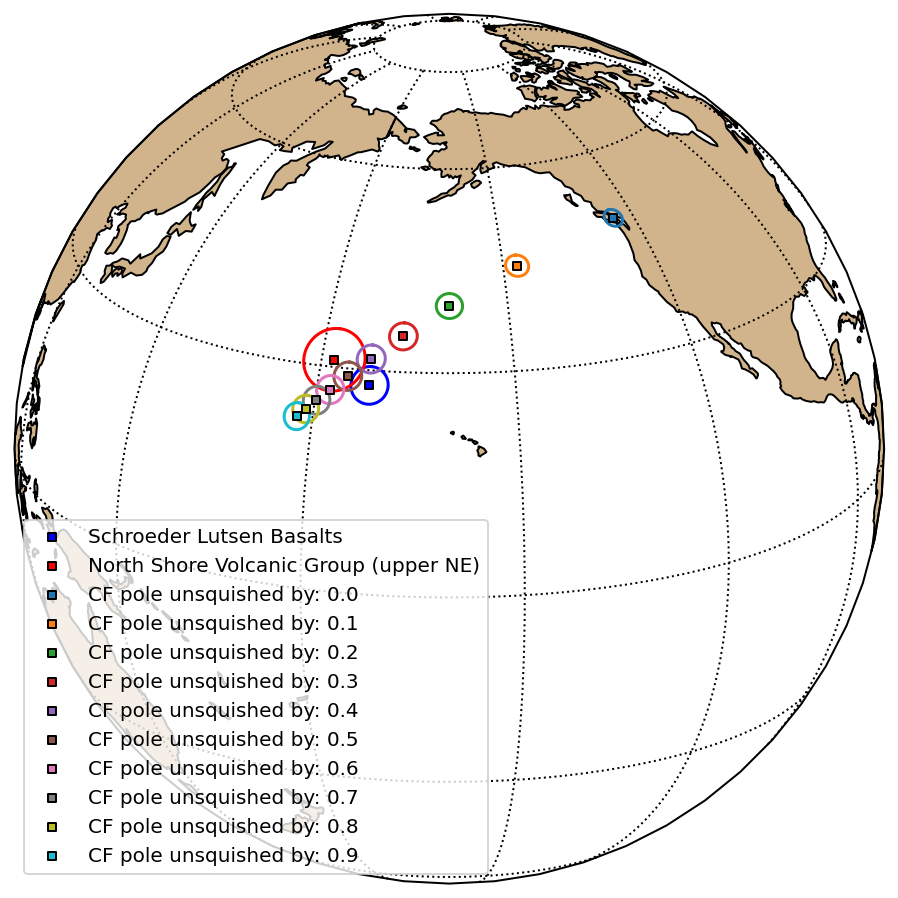

In [34]:
NSVG_NE_plon = 181.7
NSVG_NE_plat = 31.1

CF_lat = 47.7
CF_lon = -90.44

    
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

ipmag.plot_pole(map_axis,188,28,2.5,label='Schroeder Lutsen Basalts', marker='s',color='Blue')
ipmag.plot_pole(map_axis,182,31,4.2,label='North Shore Volcanic Group (upper NE)',marker='s',color='Red')

for i, mean_dir in enumerate(CF_undquished_mean_list):
    plon, plat, dp, dm = pmag.dia_vgp(mean_dir['dec'], mean_dir['inc'], mean_dir['alpha95'], CF_lat, CF_lon)
    
    ipmag.plot_pole(map_axis,plon,plat, mean_dir['alpha95'],label='CF pole unsquished by: '+ str(i/len(CF_undquished_mean_list)),
               marker='s',color='C'+str(i))

plt.legend()
plt.show()

## Plot theoretical expected inclination vs observed inclination

In [35]:
expected_incs = np.linspace(0,90,91)
expected_incs_rad = expected_incs*(np.pi/180)
measured_inc_f_9 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.9)
measured_inc_f_8 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.8)
measured_inc_f_7 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.7)
measured_inc_f_6 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.6)
measured_inc_f_5 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.5)
measured_inc_f_4 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.4)
measured_inc_f_3 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.3)
measured_inc_f_2 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.2)
measured_inc_f_1 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.1)
measured_inc_f_05 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.05)

In [41]:
NE_NSVG_inc = 41.4

nsvg_f_9 = ipmag.squish(NE_NSVG_inc,.9)
nsvg_f_8 = ipmag.squish(NE_NSVG_inc,.8)
nsvg_f_7 = ipmag.squish(NE_NSVG_inc,.7)
nsvg_f_6 = ipmag.squish(NE_NSVG_inc,.6)
nsvg_f_5 = ipmag.squish(NE_NSVG_inc,.5)
nsvg_f_4 = ipmag.squish(NE_NSVG_inc,.4)
nsvg_f_3 = ipmag.squish(NE_NSVG_inc,.3)
nsvg_f_2 = ipmag.squish(NE_NSVG_inc,.2)
nsvg_f_1 = ipmag.squish(NE_NSVG_inc,.1)

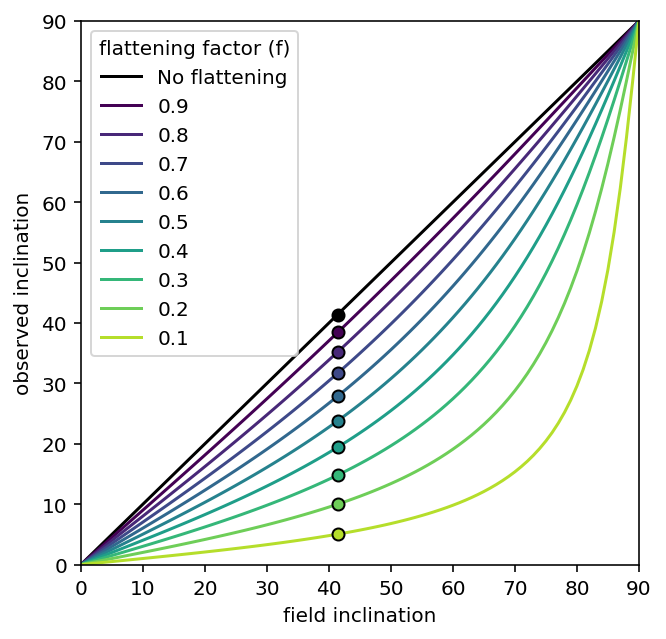

In [42]:
obs_vs_measure_plot = plt.figure(figsize=(5,5))
plt.plot([0,90],[0,90], label='No flattening', color='black')
plt.scatter(NE_NSVG_inc,NE_NSVG_inc,color='black',edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_9, label='0.9', color=viridis(0))
plt.scatter(NE_NSVG_inc,nsvg_f_9,color=viridis(0),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_8, label='0.8', color=viridis(1))
plt.scatter(NE_NSVG_inc,nsvg_f_8,color=viridis(1),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_7, label='0.7', color=viridis(2))
plt.scatter(NE_NSVG_inc,nsvg_f_7,color=viridis(2),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_6, label='0.6', color=viridis(3))
plt.scatter(NE_NSVG_inc,nsvg_f_6,color=viridis(3),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_5, label='0.5', color=viridis(4))
plt.scatter(NE_NSVG_inc,nsvg_f_5,color=viridis(4),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_4, label='0.4', color=viridis(5))
plt.scatter(NE_NSVG_inc,nsvg_f_4,color=viridis(5),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_3, label='0.3', color=viridis(6))
plt.scatter(NE_NSVG_inc,nsvg_f_3,color=viridis(6),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_2, label='0.2', color=viridis(7))
plt.scatter(NE_NSVG_inc,nsvg_f_2,color=viridis(7),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_1, label='0.1', color=viridis(8))
plt.scatter(NE_NSVG_inc,nsvg_f_1,color=viridis(8),edgecolors='black',zorder=100)
#plt.title('Corrected vs Observed Inclination')
plt.legend(title='flattening factor (f)')
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel('field inclination')
plt.ylabel('observed inclination')
obs_vs_measure_plot.savefig('../code_output/field_vs_measure_plot.pdf', bbox_inches='tight')
plt.show()

In [43]:
NE_NSVG_inc

41.4

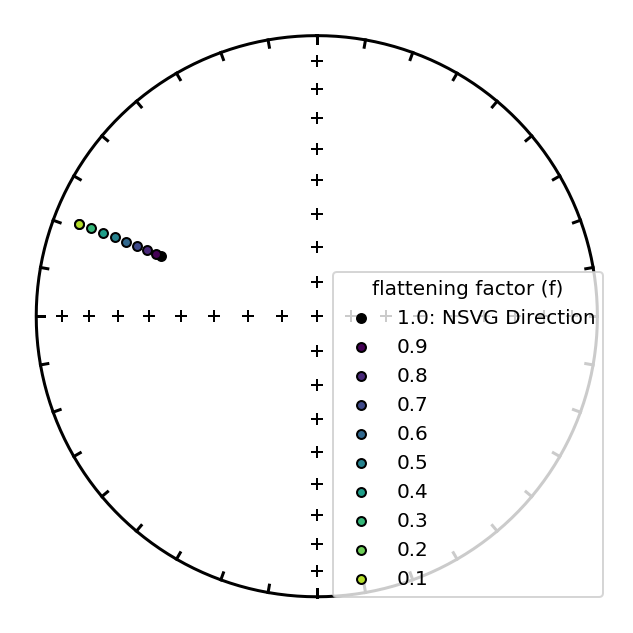

In [45]:
upper_nsvg_shallowing = plt.figure(num=fignum,figsize=(4.5,4.5))
ipmag.plot_net(fignum)
ipmag.plot_di(291.3, 40.3, label='1.0: NSVG Direction' )
ipmag.plot_di(291.3, nsvg_f_9, color=viridis(0), label='0.9',edge='black')
ipmag.plot_di(291.3, nsvg_f_8, color=viridis(1), label='0.8',edge='black')
ipmag.plot_di(291.3, nsvg_f_7, color=viridis(2), label='0.7',edge='black')
ipmag.plot_di(291.3, nsvg_f_6, color=viridis(3), label='0.6',edge='black')
ipmag.plot_di(291.3, nsvg_f_5, color=viridis(4), label='0.5',edge='black')
ipmag.plot_di(291.3, nsvg_f_4, color=viridis(5), label='0.4',edge='black')
ipmag.plot_di(291.3, nsvg_f_3, color=viridis(6), label='0.3',edge='black')
ipmag.plot_di(291.3, nsvg_f_2, color=viridis(7), label='0.2',edge='black')
ipmag.plot_di(291.3, nsvg_f_2, color=viridis(8), label='0.1',edge='black')
plt.legend(loc=8,title='flattening factor (f)',bbox_to_anchor=(0.75,0.02))
#plt.title('Shallowing of the Upper Northeast Sequence NSVG Direction', size=16)
upper_nsvg_shallowing.savefig('../code_output/upper_nsvg_shallowing.pdf', bbox_inches='tight')
plt.show()

## Simulate draws from a Fisher distribution and squish them

In [46]:
NSVG_sim = ipmag.fishrot(k=30,n=100,dec=291.3,inc=40.3)
NSVG_sim_dec, NSVG_sim_inc, mag_moment = ipmag.unpack_di_block(NSVG_sim)
NSVG_sim_inc_squished = ipmag.squish(NSVG_sim_inc, 0.6)

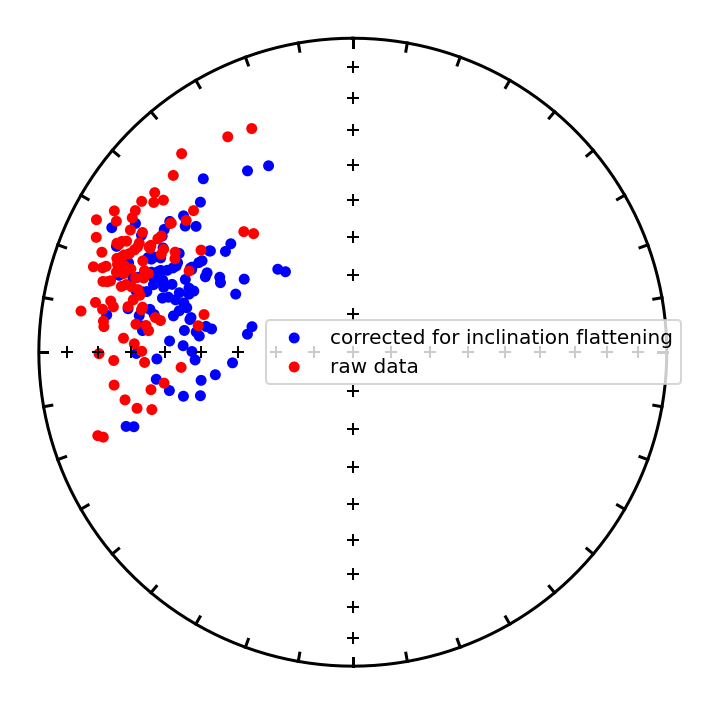

In [47]:
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(NSVG_sim_dec, NSVG_sim_inc, color='blue',label='corrected for inclination flattening')
ipmag.plot_di(NSVG_sim_dec, NSVG_sim_inc_squished,color='red',label='raw data')
plt.legend(loc=5)
plt.savefig('cf_sample_data_combined.pdf')
plt.show()

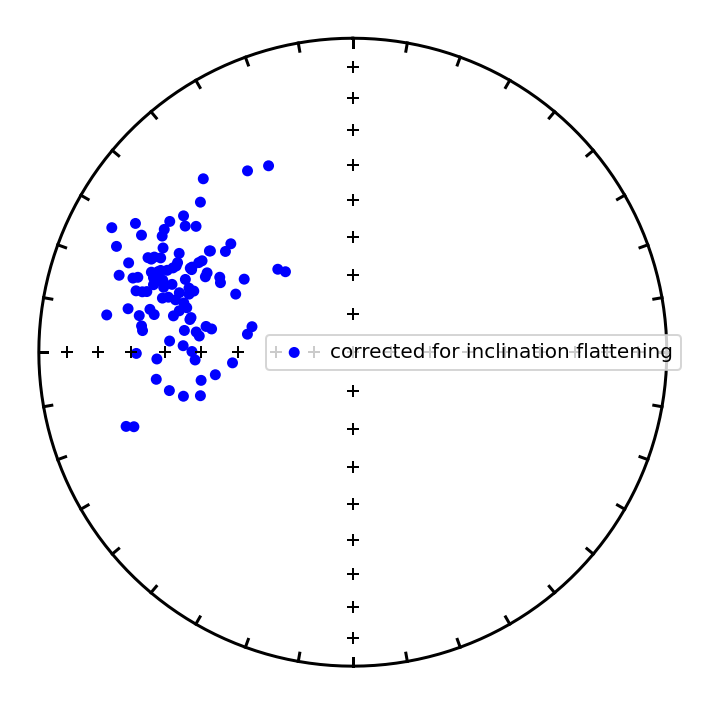

In [48]:
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(NSVG_sim_dec, NSVG_sim_inc,color='blue',label='corrected for inclination flattening')
#ipmag.plot_di(NSVG_sim_dec, NSVG_sim_inc_squished,color='red'
plt.legend(loc=5)
plt.savefig('cf_sample_data_corrected.pdf')
plt.show()

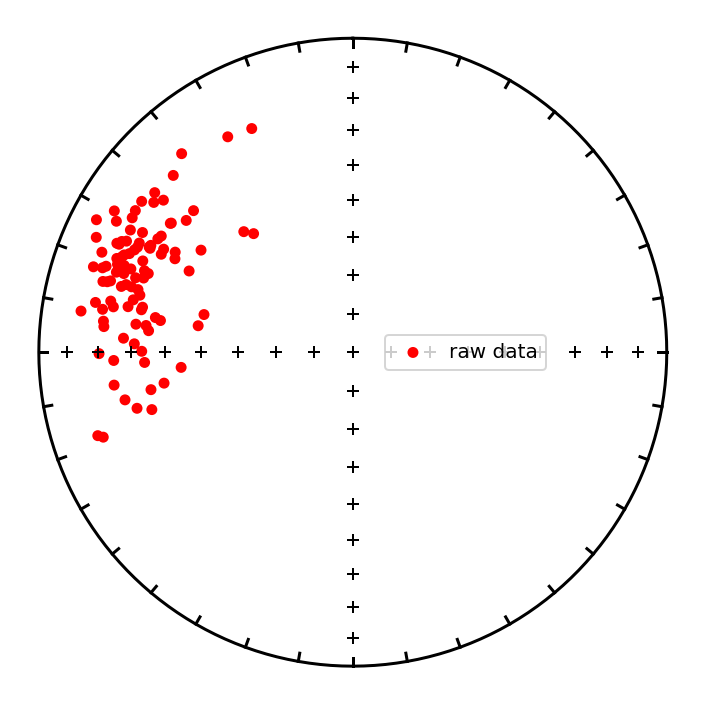

In [49]:
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
#ipmag.plot_di(NSVG_sim_dec, NSVG_sim_inc)
ipmag.plot_di(NSVG_sim_dec, NSVG_sim_inc_squished,color='red',label='raw data')
plt.legend(loc=7,bbox_to_anchor=(.8, .5))
plt.savefig('cf_sample_data_raw.pdf')
plt.show()

In [50]:
NSVG_sim_mean = ipmag.fisher_mean(NSVG_sim_dec, NSVG_sim_inc)
NSVG_sim_mean

{'dec': 289.5637590557731,
 'inc': 39.774202429069845,
 'n': 100,
 'r': 96.32861419784167,
 'k': 26.965294669331698,
 'alpha95': 2.77296883200894,
 'csd': 15.598485502746792}

In [51]:
NSVG_sim_squished_mean = ipmag.fisher_mean(NSVG_sim_dec, NSVG_sim_inc_squished)
NSVG_sim_squished_mean

{'dec': 289.45138426390236,
 'inc': 27.14868939987697,
 'n': 100,
 'r': 96.00412650322795,
 'k': 24.77555910615646,
 'alpha95': 2.8978269728544537,
 'csd': 16.27321217424185}

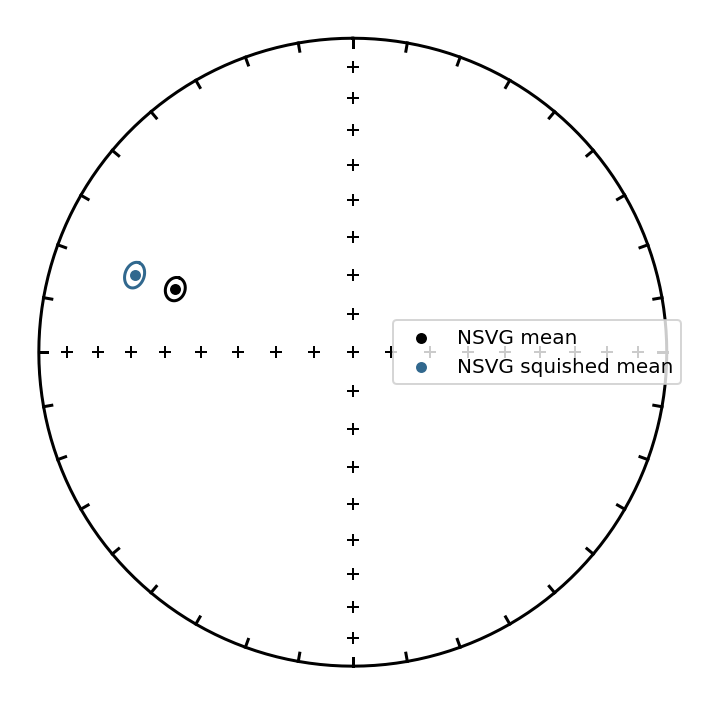

In [52]:
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di_mean(NSVG_sim_mean['dec'],NSVG_sim_mean['inc'],NSVG_sim_mean['alpha95'],label='NSVG mean')
ipmag.plot_di_mean(NSVG_sim_squished_mean['dec'],NSVG_sim_squished_mean['inc'],
                   NSVG_sim_squished_mean['alpha95'],color=viridis(3), label='NSVG squished mean')
plt.legend(loc=5)
plt.show()

# Determining the range of flattening factors consistent with common ht and mt means using the Watson common mean test

In [63]:
saved_angles_mt=(np.loadtxt('Watson_mean_test_output/good_angles_mt.txt')).tolist()
index_angle_mt=saved_angles_mt.index(min(saved_angles_mt))
saved_f_factors_mt=(np.loadtxt('Watson_mean_test_output/good_f_factors_mt.txt')).tolist()
best_f_mt=round(saved_f_factors_mt[index_angle_mt], 5)

In [64]:
print('The smallest angle between data sets is',round(min(saved_angles_mt),5), 'which corresponds to an f factor of', best_f_mt,'.')

The smallest angle between data sets is 0.02489 which corresponds to an f factor of 0.607 .


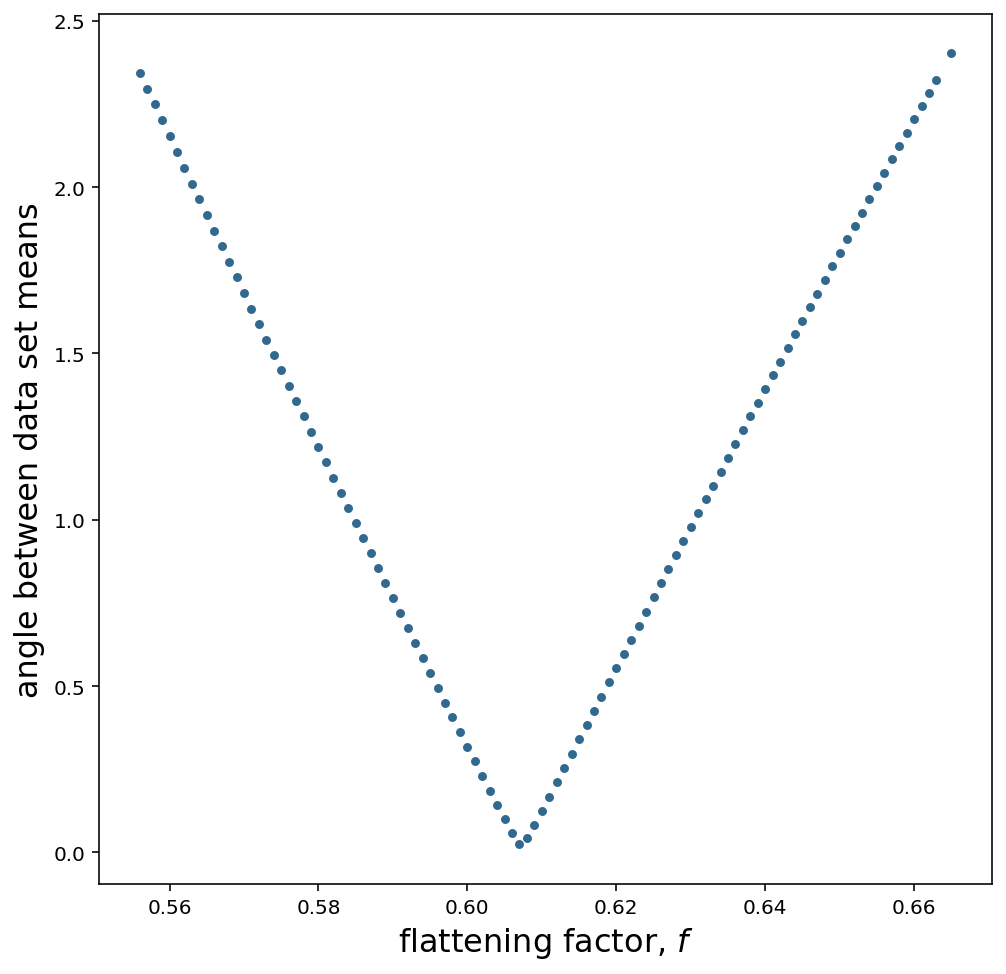

In [65]:
angles_vs_f_mt=plt.figure(num=fignum,figsize=(8,8))

plt.scatter(saved_f_factors_mt,saved_angles_mt, s=12, color= viridis(3))

plt.xlabel('flattening factor, $f$', fontsize=16)
plt.ylabel('angle between data set means', fontsize=16)

angles_vs_f_mt.savefig('angles_vs_f_mt.pdf',bbox='tight')
plt.show()

# conduct a Watson common mean test between the NSVG and CF sandstone directions

In [67]:
saved_angles_nsvg=(np.loadtxt('Watson_mean_test_output/good_angles_nsvg.txt')).tolist()
index_angle_nsvg=saved_angles_nsvg.index(min(saved_angles_nsvg))
saved_f_factors_nsvg=(np.loadtxt('Watson_mean_test_output/good_f_factors_nsvg.txt')).tolist()
best_f_nsvg=round(saved_f_factors_nsvg[index_angle_nsvg], 5)

In [68]:
print('The smallest angle between data sets is',round(min(saved_angles_nsvg),3), 'which corresponds to an f factor of', best_f_nsvg,'.')

The smallest angle between data sets is 3.138 which corresponds to an f factor of 0.637 .


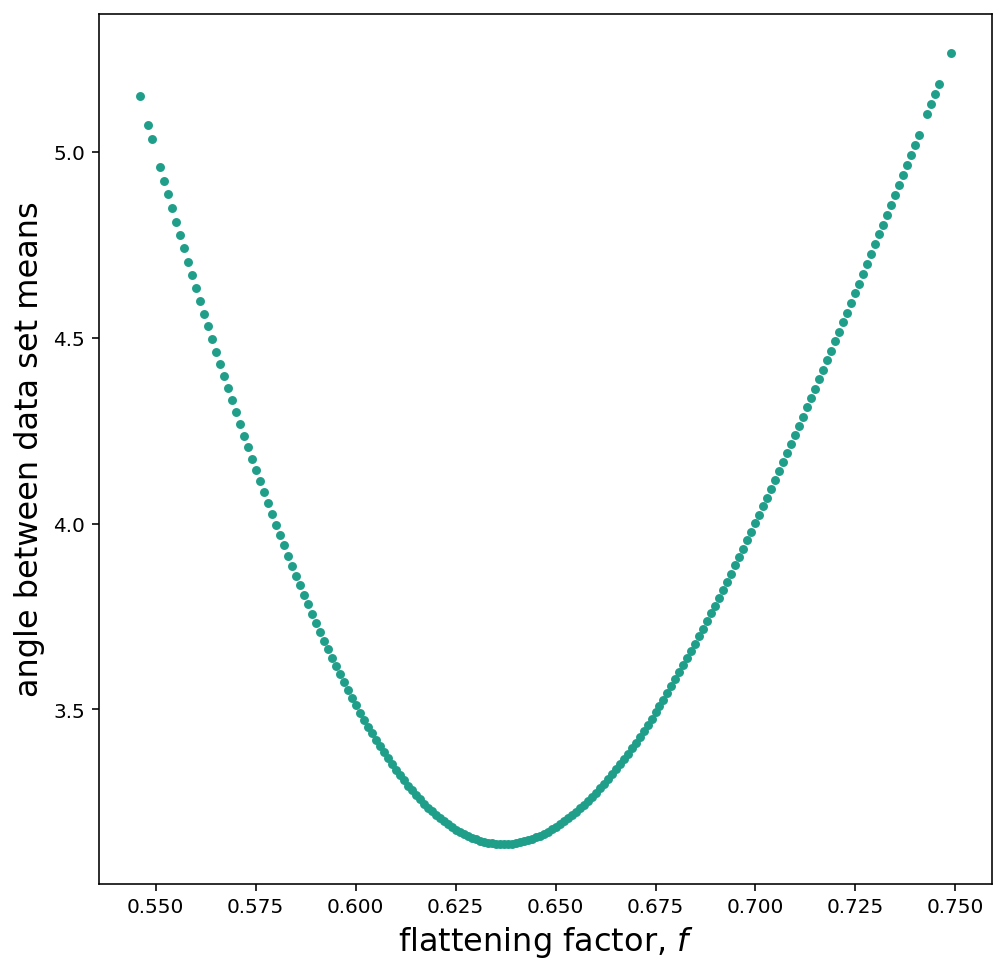

In [70]:
angles_vs_f_nsvg=plt.figure(num=fignum,figsize=(8,8))
saved_nsvg_angles=np.loadtxt('Watson_mean_test_output/good_angles_nsvg.txt')
saved_f_factors_nsvg=np.loadtxt('Watson_mean_test_output/good_f_factors_nsvg.txt')
plt.scatter(saved_f_factors_nsvg,saved_nsvg_angles, s=12, color= viridis(5))
plt.xlabel('flattening factor, $f$', fontsize=16)
plt.ylabel('angle between data set means', fontsize=16)
angles_vs_f_nsvg.savefig('Watson_mean_test_output/angles_vs_f_nsvg.pdf',bbox='tight')
plt.show()

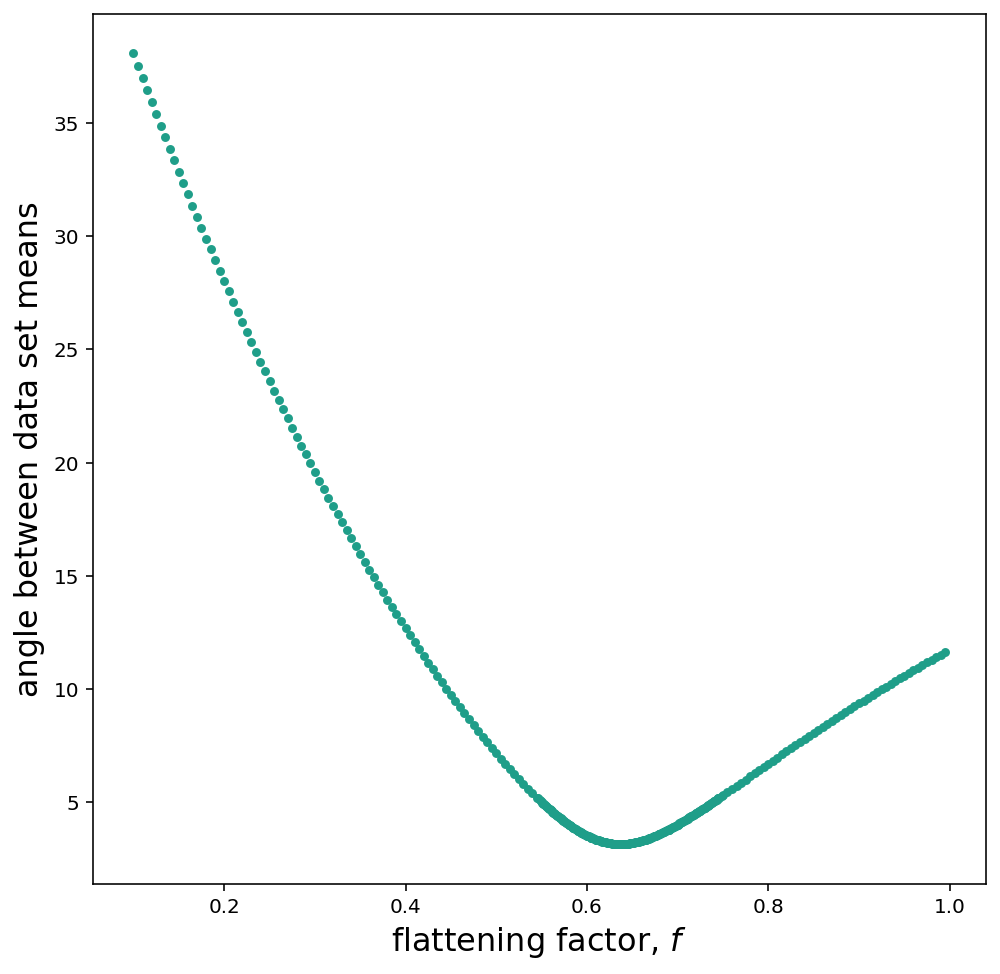

In [141]:
angles_vs_f_large=plt.figure(num=fignum,figsize=(8,8))
saved_angles_all=np.loadtxt('Watson_mean_test_output/all_angles.txt')
saved_factors_all=np.loadtxt('Watson_mean_test_output/all_factors.txt')
plt.scatter(saved_factors_all,saved_angles_all, s=12, color= viridis(5))
plt.xlabel('flattening factor, $f$', fontsize=16)
plt.ylabel('angle between data set means', fontsize=16)
plt.subplot(1,1,1)
plt.scatter(saved_f_factors_nsvg,saved_nsvg_angles, s=12, color= viridis(5))


#angles_vs_f_large.savefig('angles_vs_f_large.pdf',bbox='tight')
plt.show()

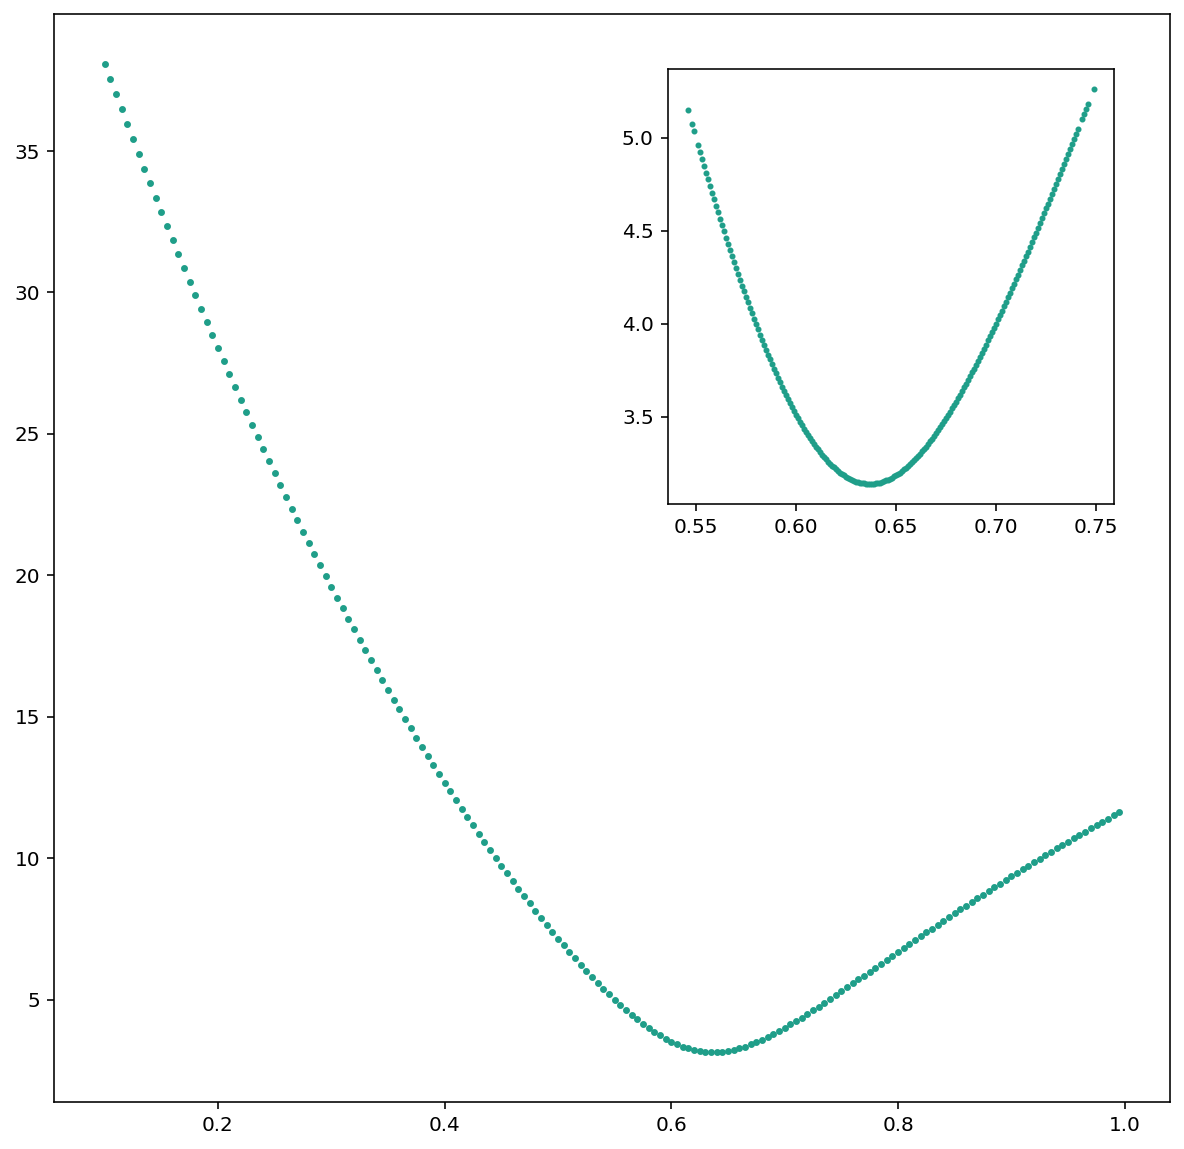

In [191]:


fig,inset=plt.subplots(figsize=(10,10))
inset.scatter(saved_factors_all,saved_angles_all,s=6, color= viridis(5))


fig_inset=inset.inset_axes([.55,.55,.4,.4])
fig_inset.scatter(saved_f_factors_nsvg,saved_nsvg_angles,s=4, color= viridis(5))

plt.show()

In [175]:
NSVG_Data=pd.read_csv('../../data/data_Compiled/Tauxe2009/pmag_results.txt',sep='\t',skiprows=1)
nneu_site_list = ['ns002',
                  'ns003',
                  'ns004',
                  'ns005',
                  'ns016',
                  'ns018',
                  'ns019',
                  'ns020',
                  'ns021',
                  'ns022',
                  'ns023',
                  'ns028',
                  'ns030',
                  'ns031',
                  'ns032']
nneu_data = NSVG_Data.loc[NSVG_Data['er_site_names'].isin(nneu_site_list)]
Books1972_sites = pd.read_csv('../../data/data_compiled/Books1972/sites.txt',sep='\t',header=1)
Books1972_MN_sites = Books1972_sites[Books1972_sites.location == 'North Shore Volcanic Group:Minnesota']
nneu_nmil_sites_B72 = ['NS269','NS378','NS227']
nneu_nkcr_sites_B72 = ['NS229','NS375']
nneu_nrcb_sites_B72 = ['NS226']
nneu_ncvb_sites_B72 = ['NS362','NS365']
nneu_ngha_sites_B72 = ['NS367','NS265']
nneu_ntpb_sites_B72 = ['NS368',
                       'NS369',
                       'NS374',
                       'NS376',
                       'NS377',
                       'NS169',
                       'NS170',
                       'NS171']
nneu_norl_sites_B72 = ['NS370',
                       'NS371',
                       'NS372']
nneu_B72_site_list = nneu_nmil_sites_B72 + nneu_nkcr_sites_B72 + nneu_nrcb_sites_B72 + nneu_ncvb_sites_B72 + nneu_ngha_sites_B72 + nneu_norl_sites_B72 
nneu_data_B72 = Books1972_MN_sites.loc[Books1972_MN_sites['site'].isin(nneu_B72_site_list)]
nneu_combined_dir_dec = nneu_data_B72.dir_dec.tolist() + nneu_data.average_dec.tolist()
nneu_combined_dir_inc = nneu_data_B72.dir_inc.tolist() + nneu_data.average_inc.tolist()


nneu_dirs = ipmag.make_di_block(nneu_combined_dir_dec,
                                nneu_combined_dir_inc)
nneu_dir_mean=pmag.fisher_mean(nneu_dirs)

In [79]:
mt_tc_di_block = ipmag.make_di_block(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())

In [80]:
mt_vs_NSVG_mean_test=ipmag.common_mean_watson(mt_tc_di_block,nneu_dirs)
mt_vs_NSVG_mean_test

Results of Watson V test: 

Watson's V:           2.8
Critical value of V:  6.1
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.4
Critical angle for M&M1990:   5.0
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.402632503993828, 5.011454201984939)

In [81]:
e_i_corrected_incs=ipmag.unsquish(specimens_ht_tc['dir_inc'],0.684999)
ei_corrected_block=ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),e_i_corrected_incs.tolist())
ipmag.common_mean_watson(ei_corrected_block,nneu_dirs)

Results of Watson V test: 

Watson's V:           3.1
Critical value of V:  6.4
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.7
Critical angle for M&M1990:   5.3
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.677119019771982, 5.270908087403554)

In [82]:
ht_mt_incs_watson_unsquish=ipmag.unsquish(specimens_ht_tc['dir_inc'],.607)
emp_mt_corrected_directions=ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),ht_mt_incs_watson_unsquish.tolist())
ipmag.common_mean_watson(emp_mt_corrected_directions,nneu_dirs)

Results of Watson V test: 

Watson's V:           2.6
Critical value of V:  6.1
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.4
Critical angle for M&M1990:   5.1
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.3841642332096358, 5.14538538255743)

In [83]:
ei_vs_NSVG_mean_test=ipmag.common_mean_watson(mt_tc_di_block,nneu_dirs)
mt_vs_NSVG_mean_test

Results of Watson V test: 

Watson's V:           2.8
Critical value of V:  6.3
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.4
Critical angle for M&M1990:   5.1
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.402632503993828, 5.011454201984939)

## Using the f factor calculated from the Watson mean test, a site mean can be calculated for the Cut Face Creek sandstone

# comparing e/i method to the empirically derived factor

In [89]:
def elongation_calc(di_block):
    princ_comps = pmag.doprinc(di_block)
    elongation = princ_comps['tau2']/princ_comps['tau3']
    return elongation

def elongation_bootstrap(di_block, nb=1000):
    elong_list = []
    inc_list = []
    for n in range(nb): 
        pDIs = pmag.pseudo(di_block)
        pseudo_elong = elongation_calc(pDIs)
        elong_list.append(pseudo_elong)
        mean = pmag.fisher_mean(pDIs)
        inc_list.append(np.absolute(mean['inc']))
    low = round(np.percentile(elong_list, 2.5), 4)
    high = round(np.percentile(elong_list,97.5), 4)
    elong = round(elongation_calc(di_block), 4)
    mean = pmag.fisher_mean(di_block)
    inc = np.absolute(mean['inc'])
    inc_low = round(np.percentile(inc_list, 2.5), 4)
    inc_high = round(np.percentile(inc_list, 97.5), 4)
    return [elong, low, high], [inc, inc_low, inc_high]
    print(elong, low, high, inc, inc_low, inc_high)
    
xa = np.linspace(0,90,num=90)
TK03GAD = 2.895 + -1.466e-2*xa + -3.525e-4*xa**2 + 3.160e-6*xa**3

In [90]:
ht_unsquished_incs = ipmag.unsquish(specimens_ht_tc['dir_inc'].tolist(),best_f_nsvg)
ht_di_block_f_corrected = ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),ht_unsquished_incs)

mt_elong, mt_inc = elongation_bootstrap(mt_tc_di_block)
ht_elong, ht_inc = elongation_bootstrap(ht_tc_di_block)
ht_elong_ei, ht_inc_ei = elongation_bootstrap(ht_tc_ei_corrected)
ht_elong_f, ht_inc_f = elongation_bootstrap(ht_di_block_f_corrected)

NameError: name 'ht_tc_ei_corrected' is not defined

In [ ]:
tk03_curve=plt.figure(figsize=(9,4.5))
plt.plot(xa,TK03GAD,color='grey',label='TK03.GAD',linestyle='-.')
plt.ylim(1,3.5)
plt.errorbar(mt_inc[0], mt_elong[0], yerr=[[mt_elong[0]-mt_elong[1]],[mt_elong[2]-mt_elong[0]]], 
             xerr=[[mt_inc[0]-mt_inc[1]],[mt_inc[2]-mt_inc[0]]], fmt='o', ms=5,color='darkred', label='hematite CRM')
plt.errorbar(ht_inc[0], ht_elong[0], yerr=[[ht_elong[0]-ht_elong[1]],[ht_elong[2]-ht_elong[0]]], 
             xerr=[[ht_inc[0]-ht_inc[1]],[ht_inc[2]-ht_inc[0]]], fmt='o', ms=5,color='darkgreen', label='hematite DRM')
plt.errorbar(ht_inc_ei[0], ht_elong_ei[0], yerr=[[ht_elong_ei[0]-ht_elong_ei[1]],[ht_elong_ei[2]-ht_elong_ei[0]]], 
             xerr=[[ht_inc_ei[0]-ht_inc_ei[1]],[ht_inc_ei[2]-ht_inc_ei[0]]], fmt='o', ms=5,color='C0', label='hematite DRM (EI corrected)')
plt.errorbar(ht_inc_f[0], ht_elong_f[0], yerr=[[ht_elong_f[0]-ht_elong_f[1]],[ht_elong_f[2]-ht_elong_f[0]]], 
             xerr=[[ht_inc_f[0]-ht_inc_f[1]],[ht_inc_f[2]-ht_inc_f[0]]], fmt='o', ms=5,color='C1', label='hematite DRM (f corrected)')
plt.ylabel('elongation')
plt.xlabel('inclination')
plt.legend(loc=1)
#tk03_curve.savefig('code_output/tk03_curve.pdf', bbox='tight')
plt.show()

## confidence bounds range from e/i

In [ ]:
e_i_range_low=np.rad2deg(np.arctan(.5*np.tan(np.deg2rad(32.031612138))))
e_i_range_hi=np.rad2deg(np.arctan(.5*np.tan(np.deg2rad(44.2408988))))

In [ ]:
R_earth = 6373.0

lat1 = math.radians(e_i_range_low)
lon1 = math.radians(0)
lat2 = math.radians(e_i_range_hi)
lon2 = math.radians(0)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2 #Haversine formula

c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
distance = round(R_earth * c,2)

print(distance, 'kilometers')

## difference between suggest factor from e/i and empirically derived factor 

In [ ]:
emp_inc=41.632127
emp_lat=np.rad2deg(np.arctan(.5*np.tan(np.deg2rad(emp_inc))))
e_i_inc=38.5166117
e_i_lat=np.rad2deg(np.arctan(.5*np.tan(np.deg2rad(e_i_inc))))

In [91]:
R_earth = 6373.0

lat1 = math.radians(e_i_lat)
lon1 = math.radians(0)
lat2 = math.radians(emp_lat)
lon2 = math.radians(0)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2 #Haversine formula

c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
distance = round(R_earth * c,2)

print(distance, 'kilometers')

NameError: name 'e_i_lat' is not defined

In [92]:
#ipmag.find_ei(np.array(mt_tc_di_block),save=False,save_folder='./code_output')

In [63]:
#best_f_nsvg
#f_factor_ht_mt
#f_factor_ht_NSVG
Cutface_lat = 47.73055
Cutface_lon = -90.44128
e_i_corrected_incs=ipmag.unsquish(specimens_ht_tc['dir_inc'],0.684999)
ht_mt_incs_watson_unsquish=ipmag.unsquish(specimens_ht_tc['dir_inc'],.607)
ht_nsvg_incs_watson_unsquish=ipmag.unsquish(specimens_ht_tc['dir_inc'],.635)

In [88]:
e_i_corrected_mean_directions=ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),e_i_corrected_incs.tolist())
emp_mt_corrected_mean_directions=ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),ht_mt_incs_watson_unsquish.tolist())
emp_nsvg_corrected_mean_directions=ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),ht_nsvg_incs_watson_unsquish.tolist())
print(e_i_corrected_mean_directions)
print(emp_mt_corrected_mean_directions)
print(emp_nsvg_corrected_mean_directions)

{'dec': 287.21451677030257, 'inc': 38.40110872716916, 'n': 152, 'r': 148.05576109164735, 'k': 38.28368501721079, 'alpha95': 1.8721753020989942, 'csd': 13.09116062873327}
{'dec': 287.21009145760206, 'inc': 41.58835392933117, 'n': 152, 'r': 148.00181740684715, 'k': 37.76715957360164, 'alpha95': 1.8852789568829134, 'csd': 13.180377747773854}
{'dec': 287.2117217324296, 'inc': 40.393721797591496, 'n': 152, 'r': 148.01674308199543, 'k': 37.9086770219291, 'alpha95': 1.8816614811352819, 'csd': 13.155752811851665}


In [65]:
e_i_corrected_vgp=pmag.dia_vgp(e_i_corrected_mean_directions['dec'],e_i_corrected_mean_directions['inc'],1.7756643774953274,Cutface_lat,Cutface_lon)
emp_mt_corrected_vgp=pmag.dia_vgp(emp_mt_corrected_mean_directions['dec'],emp_mt_corrected_mean_directions['inc'],1.8852789568829134,Cutface_lat,Cutface_lon)
emp_nsvg_corrected_vgp=pmag.dia_vgp(emp_nsvg_corrected_mean_directions['dec'],emp_nsvg_corrected_mean_directions['inc'],1.8852789568829134,Cutface_lat,Cutface_lon)



<Figure size 504x504 with 0 Axes>

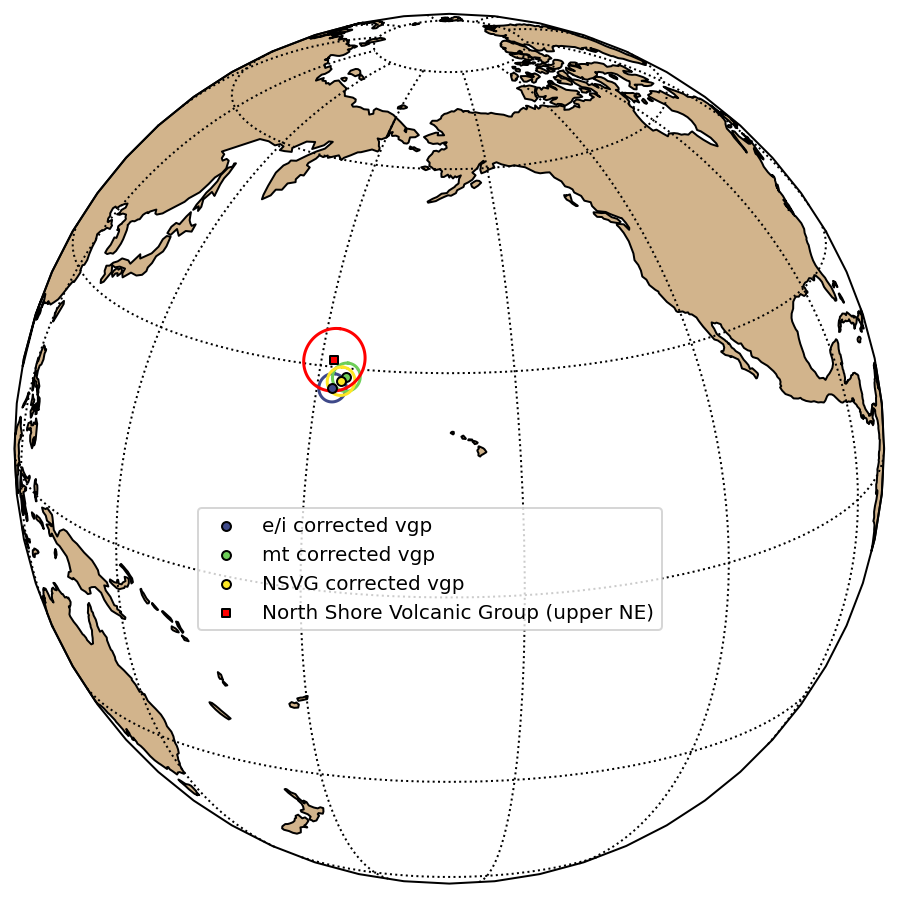

In [66]:
vgp_mt_ei=plt.figure(figsize=(7, 7))
map_axis_vgp=ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

ipmag.plot_pole(map_axis_vgp,e_i_corrected_vgp[0],e_i_corrected_vgp[1],e_i_corrected_mean_directions['alpha95'],color=viridis(2),label='e/i corrected vgp')
ipmag.plot_pole(map_axis_vgp,emp_mt_corrected_vgp[0],emp_mt_corrected_vgp[1],emp_mt_corrected_mean_directions['alpha95'],color=viridis(7),label='mt corrected vgp')
ipmag.plot_pole(map_axis_vgp,emp_nsvg_corrected_vgp[0],emp_nsvg_corrected_vgp[1],emp_nsvg_corrected_mean_directions['alpha95'],color=viridis(9),label='NSVG corrected vgp')


ipmag.plot_pole(map_axis_vgp,182,31,4.2,label='North Shore Volcanic Group (upper NE)',marker='s',color='Red')

plt.legend(loc=3,bbox_to_anchor=(.2,.28))
plt.savefig('code_output/vgp_mt_ei.pdf',bbox='tight')

plt.show()

### Lets determine the difference in shallowing as a function of grain size

In [67]:
cf_grain_sizes=pd.read_csv('../data/Pmag/cf_specimen_lithologies.csv')
cf_specimens_directions_and_grain=pd.merge(cf_grain_sizes,Cutface_specimens,on='specimen')

In [68]:
cf_fine_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']<3) & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]
cf_coarse_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']>2) & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]

### fine grained specimens

In [69]:
cf_fine_grain_mean=ipmag.fisher_mean(cf_fine_grain['dir_dec'].tolist(),cf_fine_grain['dir_inc'].tolist())
cf_fine_grain_mean

{'dec': 287.3498564372758,
 'inc': 27.187452162488004,
 'n': 97,
 'r': 94.85788059888151,
 'k': 44.81542903251532,
 'alpha95': 2.1680108953445405,
 'csd': 12.099606308479295}

### "coarse" grained specimens

In [70]:
cf_coarse_grain_mean=ipmag.fisher_mean(cf_coarse_grain['dir_dec'].tolist(),cf_coarse_grain['dir_inc'].tolist())
cf_coarse_grain_mean

{'dec': 287.0062130968154,
 'inc': 32.22209610531435,
 'n': 55,
 'r': 53.7175920196136,
 'k': 42.108284435136824,
 'alpha95': 2.990525553779167,
 'csd': 12.482490521404287}

### silt and clay

In [71]:
cf_silt_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']<1.1) & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]
cf_silt_grain_mean=ipmag.fisher_mean(cf_silt_grain['dir_dec'].tolist(),cf_silt_grain['dir_inc'].tolist())
cf_silt_grain_mean

{'dec': 287.8768958876324,
 'inc': 25.402533702565915,
 'n': 56,
 'r': 54.98134636726819,
 'k': 53.992837440241296,
 'alpha95': 2.609705646042245,
 'csd': 11.023434940948984}

### very fine sand

In [72]:
cf_vfs_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']==2) & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]
cf_vfs_grain_mean=ipmag.fisher_mean(cf_vfs_grain['dir_dec'].tolist(),cf_vfs_grain['dir_inc'].tolist())
cf_vfs_grain_mean

{'dec': 286.5958761252738,
 'inc': 29.64130438322355,
 'n': 41,
 'r': 39.94438221222828,
 'k': 37.89250282001688,
 'alpha95': 3.6740175154739743,
 'csd': 13.15856024188273}

### fine and medium sand

In [73]:
cf_fs_ms_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']>2.9) & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]
cf_fs_ms_grain_mean=ipmag.fisher_mean(cf_fs_ms_grain['dir_dec'].tolist(),cf_fs_ms_grain['dir_inc'].tolist())
cf_fs_ms_grain_mean

{'dec': 287.0062130968154,
 'inc': 32.22209610531435,
 'n': 55,
 'r': 53.7175920196136,
 'k': 42.108284435136824,
 'alpha95': 2.990525553779167,
 'csd': 12.482490521404287}

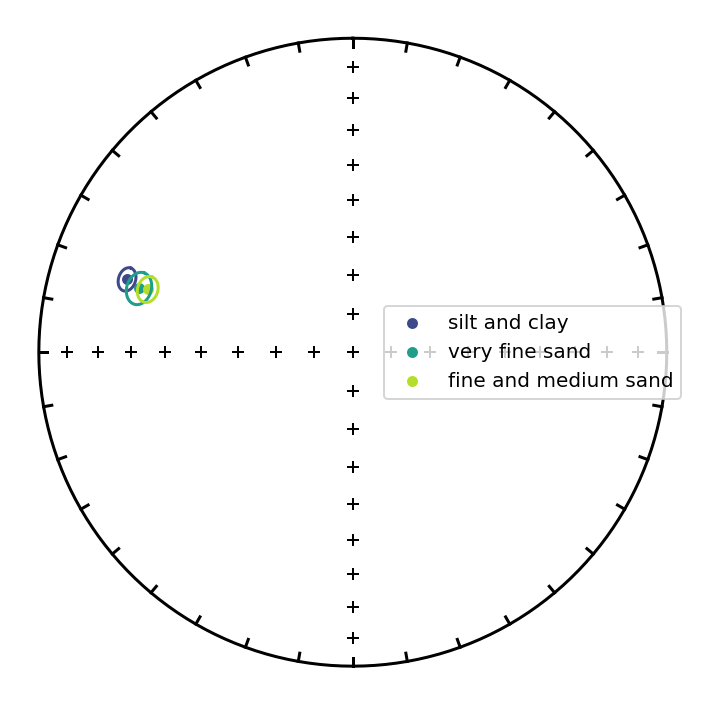

In [74]:
grain_size_stereonet=plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(cf_silt_grain_mean['dec'],cf_silt_grain_mean['inc'],cf_silt_grain_mean['alpha95'],viridis(2),label='silt and clay')
ipmag.plot_di_mean(cf_vfs_grain_mean['dec'],cf_vfs_grain_mean['inc'],cf_vfs_grain_mean['alpha95'],viridis(5), label='very fine sand')
ipmag.plot_di_mean(cf_fs_ms_grain_mean['dec'],cf_fs_ms_grain_mean['inc'],cf_fs_ms_grain_mean['alpha95'],viridis(8),label='fine and medium sand')

plt.legend(loc=5)
grain_size_stereonet.savefig('code_output/grain_size_stereonet.pdf', bbox='tight')                   
plt.show()

### do rip ups effect the inclination??

In [75]:
cf_no_rip_ups=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['rip_ups']== 'n') & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]
cf_no_rip_ups_mean=ipmag.fisher_mean(cf_no_rip_ups['dir_dec'].tolist(),cf_no_rip_ups['dir_inc'].tolist())
cf_no_rip_ups_mean

{'dec': 287.0689712663103,
 'inc': 28.565931704022862,
 'n': 141,
 'r': 137.63602611716146,
 'k': 41.61744557953208,
 'alpha95': 1.8630817034894849,
 'csd': 12.555884404562677}

In [76]:
cf_yes_rip_ups=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['rip_ups']== 'y') & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]
cf_yes_rip_ups_mean=ipmag.fisher_mean(cf_yes_rip_ups['dir_dec'].tolist(),cf_yes_rip_ups['dir_inc'].tolist())
cf_yes_rip_ups_mean

{'dec': 289.3997698339355,
 'inc': 34.589557548066836,
 'n': 11,
 'r': 10.868256221146908,
 'k': 75.90491245245825,
 'alpha95': 5.2742988653119145,
 'csd': 9.297155118933636}

# RESULTS

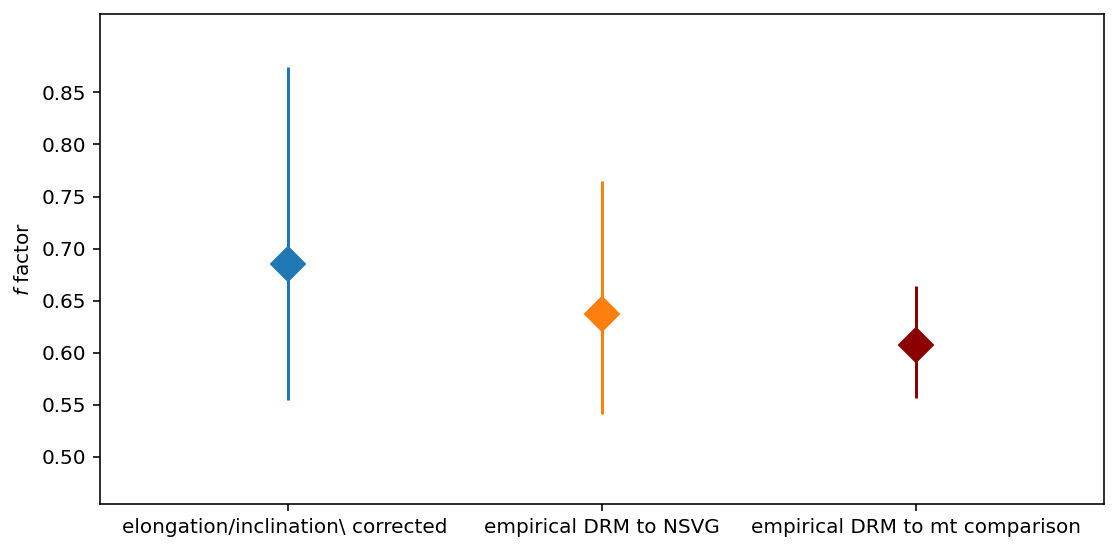

In [98]:
summary_f_figure=plt.figure(figsize=(9,4.5))
plt.ylim(.455,.925)

final_f_ei=['elongation/inclination corrected ']
final_f_nsvg=['empirical DRM to NSVG']
final_f=['empirical DRM to CRM comparison']

tick_range=np.arange(.50,.90,.05)

plt.yticks(tick_range)
#plt.xticks(size=14)
plt.ylabel('$f$ factor')

plt.margins(x=.3)

plt.errorbar(final_f_ei,0.685, yerr=[[.13],[.189]],marker='D',markersize='12',color='C0')
plt.errorbar(final_f_nsvg,best_f_nsvg, yerr=[[.096],[.128]],marker='D',markersize='12',color='C1')
plt.errorbar(final_f,best_f_mt, yerr=[[.051],[.057]],marker='D',markersize='12',color='darkred')

plt.savefig('../code_output/summary_f_figure.pdf')

plt.show()

In [82]:
best_f_mt

0.607

In [ ]:
[local_igrf_dec],[local_igrf_inc]

In [84]:
local_igrf_inc

73.03790699273897